In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Problem 1.1, Implementing Gradient Descent

In [18]:
#test parameters

u_test = np.array([10,10])
cov_test = np.array([10,0,0,10]).reshape([2,2])
A_test = np.array([10,5,5,10]).reshape([2,2])
b_test = np.array([400,400])

In [19]:
#Objective funtions and gradients

#test objective function, vectorized input
    #mean: vector of means of input vars
    #cov: covariance matrix of input vars
    #x: vector of inputs
#returns scalar output
def gaussian_objective(u, cov, x):
    return -np.power(10,4) / (np.sqrt(np.power(2*np.pi,len(u))*np.linalg.det(cov))) *np.exp(-0.5 * np.dot(np.dot(np.subtract(x,u),np.linalg.inv(cov)), np.subtract(x,u)))
    
def gaussian_gradient(u, cov, x):
    return -1*gaussian_objective(u,cov,x)*np.linalg.inv(cov)*np.subtract(x,u)

#quadratic objective function
    #A: positive definite matrix
    #b: vector
def quadratic_objective(A,b,x):
    return 0.5 * np.subtract(np.dot(np.dot(x,A),x),np.dot(x,b))

def quadratic_gradient(A,b,x):
    return np.subtract(np.dot(A,x),b)
    

In [20]:
#gradient descent

def run_gradient_descent(func, deriv, x0, h, tol):
    x = []
    d = []
    f = []
    while 1:
        dx0 = deriv(x0)
        x.append(x0)
        d.append(dx0)
        
        x1 = x0 - h*dx0
        fx1 = func(x1)
        fx0 = func(x0)
        f.append(fx0)
        if np.all(abs(fx1-fx0) < tol):
            x.append(x1)
            f.append(fx1)
            break
        x0 = x1
    return x, d, f


In [21]:
run_gradient_descent(lambda x: quadratic_objective(u_test, cov_test, x) ,lambda x: quadratic_gradient(A_test,b_test, x), np.array([10,10]), .1, .001)


([array([10, 10]),
  array([ 35.,  35.]),
  array([ 22.5,  22.5]),
  array([ 28.75,  28.75]),
  array([ 25.625,  25.625]),
  array([ 27.1875,  27.1875]),
  array([ 26.40625,  26.40625]),
  array([ 26.796875,  26.796875]),
  array([ 26.6015625,  26.6015625]),
  array([ 26.69921875,  26.69921875]),
  array([ 26.65039062,  26.65039062]),
  array([ 26.67480469,  26.67480469]),
  array([ 26.66259766,  26.66259766]),
  array([ 26.66870117,  26.66870117]),
  array([ 26.66564941,  26.66564941]),
  array([ 26.66717529,  26.66717529]),
  array([ 26.66641235,  26.66641235]),
  array([ 26.66679382,  26.66679382]),
  array([ 26.66660309,  26.66660309]),
  array([ 26.66669846,  26.66669846]),
  array([ 26.66665077,  26.66665077]),
  array([ 26.66667461,  26.66667461]),
  array([ 26.66666269,  26.66666269]),
  array([ 26.66666865,  26.66666865]),
  array([ 26.66666567,  26.66666567]),
  array([ 26.66666716,  26.66666716])],
 [array([-250, -250]),
  array([ 125.,  125.]),
  array([-62.5, -62.5]),
  ar

In [22]:
run_gradient_descent(lambda x: x**2 ,lambda x: 2*x, 10, .1, .001)


([10,
  8.0,
  6.4,
  5.12,
  4.096,
  3.2768,
  2.62144,
  2.0971520000000003,
  1.6777216000000004,
  1.3421772800000003,
  1.0737418240000003,
  0.8589934592000003,
  0.6871947673600002,
  0.5497558138880001,
  0.43980465111040007,
  0.35184372088832006,
  0.281474976710656,
  0.22517998136852482,
  0.18014398509481985,
  0.14411518807585588,
  0.11529215046068471,
  0.09223372036854777,
  0.07378697629483821,
  0.05902958103587057,
  0.04722366482869646,
  0.037778931862957166],
 [20,
  16.0,
  12.8,
  10.24,
  8.192,
  6.5536,
  5.24288,
  4.194304000000001,
  3.3554432000000007,
  2.6843545600000005,
  2.1474836480000006,
  1.7179869184000005,
  1.3743895347200004,
  1.0995116277760002,
  0.8796093022208001,
  0.7036874417766401,
  0.562949953421312,
  0.45035996273704965,
  0.3602879701896397,
  0.28823037615171176,
  0.23058430092136942,
  0.18446744073709553,
  0.14757395258967643,
  0.11805916207174114,
  0.09444732965739291],
 [100,
  64.0,
  40.96000000000001,
  26.2144,
  

# Problem 1.2

In [23]:
def central_difference(func, step,x):
    return (func(x+0.5*step) - func(x-0.5*step))/step

# 1.3

In [24]:
def batch_objective(theta, X, Y):
    return np.sum((np.dot(X,theta) - Y)**2)

def batch_gradient(theta, X, Y):
    return (2*np.dot(X.T,np.dot(X,theta)-Y))

In [25]:
m= 2
p = 3
testX = np.arange(m*p).reshape([m,p])
testY = np.arange(p)
testTheta = np.ones(m)

print batch_objective(testTheta,testX,testY)
print batch_gradient(testTheta,testX,testY)




ValueError: shapes (2,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [27]:
import pylab as pl

def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    X = pl.loadtxt('data/fittingdatap1_x.txt')
    y = pl.loadtxt('data/fittingdatap1_y.txt', ndmin=2)

    return (X,y) 

X_fitting, Y_fitting = getData();


print np.shape(X_fitting)
print np.shape(Y_fitting)

(100, 10)
(100, 1)


In [28]:
results = run_gradient_descent(lambda theta: batch_objective(theta, X_fitting, Y_fitting),lambda theta: batch_gradient(theta, X_fitting, Y_fitting), np.zeros((10,1)),0.000001,.1)



In [29]:

w_opt = np.dot(np.dot(np.linalg.inv(np.dot(X_fitting.T,X_fitting)), X_fitting.T), Y_fitting)
print w_opt
print batch_objective(w_opt, X_fitting, Y_fitting)
print batch_gradient(w_opt,X_fitting, Y_fitting)

[[  0.5032541 ]
 [ -2.3367948 ]
 [ -6.31670032]
 [  6.81230107]
 [ -1.06337989]
 [  6.67469398]
 [  3.4118044 ]
 [ -0.45573592]
 [-12.94593466]
 [ 15.73289812]]
8333.21421118
[[  1.32516220e-10]
 [ -1.83476345e-10]
 [  2.82170731e-10]
 [  5.51381163e-12]
 [  6.62225830e-11]
 [ -1.36196832e-10]
 [  3.18891580e-11]
 [  7.22977234e-12]
 [ -4.66116035e-11]
 [ -5.33333377e-10]]


In [30]:
results_opt = run_gradient_descent(lambda theta: batch_objective(theta, X_fitting, Y_fitting),lambda theta: batch_gradient(theta, X_fitting, Y_fitting), w_opt,0.001,.001)


In [31]:
print results[0][-1] - w_opt

[[  1.50712932e-03]
 [ -1.26490924e-03]
 [  1.59659337e-03]
 [ -1.15665882e-03]
 [ -4.48456272e-04]
 [ -2.77008092e-03]
 [ -4.97742454e-03]
 [ -9.35992122e-04]
 [  7.56091429e-04]
 [ -2.21866974e-05]]


# Stochastic Gradient Descent


In [72]:
np.random.seed(0)
def stochastic_gradient_descent(func, deriv, X, Y, theta0, tau, k, tol):
    ndata = np.shape(X)[0]
    t = 0
    #theta_list = []
    err = []
    while 1:
        order = range(ndata)
        np.random.shuffle(order)
        theta0_copy = theta0.copy()
        for i in order:
            xx = X[i,:].reshape((1,10))
            yy = Y[i].reshape((1,1))
            step = (tau+t)**(-k)
            d = deriv(theta0,xx,yy)
            theta1 = theta0-step*d
            theta0 = theta1
            t += 1
            if t > 100000:
                print err[-10:]
                raise RuntimeError
        fx1 = func(theta1,X,Y)
        fx0 = func(theta0_copy,X,Y)
        err.append(abs(fx1-fx0))
        if abs(fx1-fx0) < tol:
            break
    return theta1

    

In [74]:
results_sgd = stochastic_gradient_descent(batch_objective,batch_gradient, X_fitting, Y_fitting, w_opt, 100000000.,.75,.1)
print results_sgd-w_opt

[[  9.67679204e-05]
 [ -1.96062820e-05]
 [ -7.18805281e-05]
 [ -9.49854239e-05]
 [ -1.01177143e-04]
 [  7.92209659e-05]
 [ -1.02350916e-05]
 [  1.13831074e-04]
 [ -2.57617266e-05]
 [ -5.08723528e-05]]


In [36]:
tau = 1000000
k = .75
t = 0
for i in range(10):
    print (t+tau)**(-k)
    t += 1
    
    

3.16227766017e-05
3.16227528846e-05
3.16227291676e-05
3.16227054506e-05
3.16226817337e-05
3.16226580168e-05
3.16226342999e-05
3.16226105831e-05
3.16225868664e-05
3.16225631496e-05


In [75]:
results_sgd = stochastic_gradient_descent(batch_objective,batch_gradient, X_fitting, Y_fitting, np.zeros((10,1)), 100000000.,.75,.1)
print results_sgd-w_opt

[[  1.33944892e-03]
 [ -1.47637471e-03]
 [  1.85975256e-03]
 [ -1.38911654e-03]
 [ -4.16107113e-04]
 [ -3.05058698e-03]
 [ -5.78215266e-03]
 [ -1.27045697e-03]
 [  7.16496296e-04]
 [ -6.45513866e-05]]


# Problem 2.2

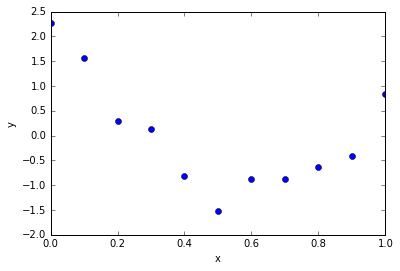

[ 2.2748  1.5728  0.2885  0.1237 -0.81   -1.5123 -0.8655 -0.8766 -0.6274
 -0.4159  0.8383]


In [4]:
import matplotlib.pyplot as plt
import pylab as pl

def getData(ifPlotData=True):
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('data/curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]

    if ifPlotData:
        plt.plot(X,Y,'o')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return (X,Y)

X, Y = getData()